<a href="https://colab.research.google.com/github/anishareddy04/ML_CSE_21206A/blob/ML_LAB_CODES/ML_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from collections import Counter
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
#uplading the dataset
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
upload= files.upload()

Mounted at /content/drive


Saving Question_1_Data.xlsx to Question_1_Data.xlsx


In [ ]:
#accessing the excel sheet
excel = pd.ExcelFile('Question_1_Data.xlsx')
data = pd.read_excel(excel, 'Question_1_Data')


In [ ]:
#printing the data
data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


A1.For the data table provided below, calculate the entropy associated with each attribute / feature
at the root node. Using this information, identify the first feature that you’d select for constructing
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.

In [ ]:
#converting the data into regression data
data=[[1,3,0,0,0],[1,3,0,1,0],[2,3,0,0,1],[3,2,0,0,1],[3,1,1,0,1],[3,1,1,1,0],[2,1,1,1,1],[1,2,0,0,0],[1,1,1,0,1],[3,2,1,0,1],[1,2,1,1,1],[2,2,0,1,1],[2,3,1,0,1],[3,2,0,1,0]]
data = pd.DataFrame(data,columns=['age','income','student','credit_rating','buys_computer'])
data

,age,income,student,credit_rating,buys_computer
0,1,3,0,0,0
1,1,3,0,1,0
2,2,3,0,0,1
3,3,2,0,0,1
4,3,1,1,0,1
5,3,1,1,1,0
6,2,1,1,1,1
7,1,2,0,0,0
8,1,1,1,0,1
9,3,2,1,0,1


In [ ]:
counts=np.bincount(data["credit_rating"])# number of each unique value in a column (6 excellent and 8 fair )
counts


array([8, 6])

In [ ]:
len(data["credit_rating"]) # total 14 instances

14

In [ ]:
#to calculate entropy
def calc_entropy(column):
  counts=np.bincount(column)
  probability = counts/(len(column))
  entropy =0
  for prob in probability:
    if prob >0:
      entropy += prob * math.log(prob,2) # calculate entropy of each value and add them to find the total emtropy
  return -entropy # as per formula of entropy

In [ ]:
# Calculating entropy of each column by using the function
entropy_bc = calc_entropy(data["buys_computer"])
print("Entropy of buys computer:", entropy_bc)
entropy_age = calc_entropy(data["age"])
print("Entropy of age:", entropy_age)
entropy_inc = calc_entropy(data["income"])
print("Entropy of income:", entropy_inc)
entropy_std = calc_entropy(data["student"])
print("Entropy of student:", entropy_std)
entropy_cr = calc_entropy(data["credit_rating"])
print("Entropy of credit_ratingr:", entropy_cr)

Entropy of buys computer: 0.9402859586706309
Entropy of age: 1.5774062828523452
Entropy of income: 1.5566567074628228
Entropy of student: 1.0
Entropy of credit_ratingr: 0.9852281360342516


In [ ]:
# to calculate gain
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract

In [ ]:
# Information gain of  each column
print()
# Calculate and print information gain for each column wrt to buys comp
info_gain_age = information_gain(data, "age", "buys_computer")
info_gain_income = information_gain(data, "income", "buys_computer")
info_gain_student = information_gain(data, "student", "buys_computer")
info_gain_credit_rating = information_gain(data, "credit_rating", "buys_computer")

print("Information Gain for 'age' with respect to 'buys_computer':", info_gain_age)
print("Information Gain for 'income' with respect to 'buys_computer':", info_gain_income)
print("Information Gain for 'student' with respect to 'buys_computer':", info_gain_student)
print("Information Gain for 'credit_rating' with respect to 'buys_computer':", info_gain_credit_rating)


Information Gain for 'age' with respect to 'buys_computer': 0.593517889222535
Information Gain for 'income' with respect to 'buys_computer': 0.26101631550442117
Information Gain for 'student' with respect to 'buys_computer': 0.15183550136234136
Information Gain for 'credit_rating' with respect to 'buys_computer': 0.04812703040826927


A2.Create a Decision Tree for the above
Get the depth of the constructed tree.

1.   List item
2.   List item



In [ ]:
# to import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # Creating an instance of the DecisionTreeClassifier
x=data.iloc[:, 0:4].values #accesing the columns from 0 to 3
x

array([[1, 3, 0, 0],
       [1, 3, 0, 1],
       [2, 3, 0, 0],
       [3, 2, 0, 0],
       [3, 1, 1, 0],
       [3, 1, 1, 1],
       [2, 1, 1, 1],
       [1, 2, 0, 0],
       [1, 1, 1, 0],
       [3, 2, 1, 0],
       [1, 2, 1, 1],
       [2, 2, 0, 1],
       [2, 3, 1, 0],
       [3, 2, 0, 1]])

In [ ]:
y = data.iloc[:, 4:5].values #accesing the column 4 #target
y

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
dt.fit(x,y) #using x and y as classifiers
DecisionTreeClassifier()
dt.score(x,y) #finding accuracy


1.0

In [ ]:
print(dt.get_depth()) #depth od tree (max number of nodes)


4


A3. Visualize the constructed tree with plot_tree() command. Following code snippet for help

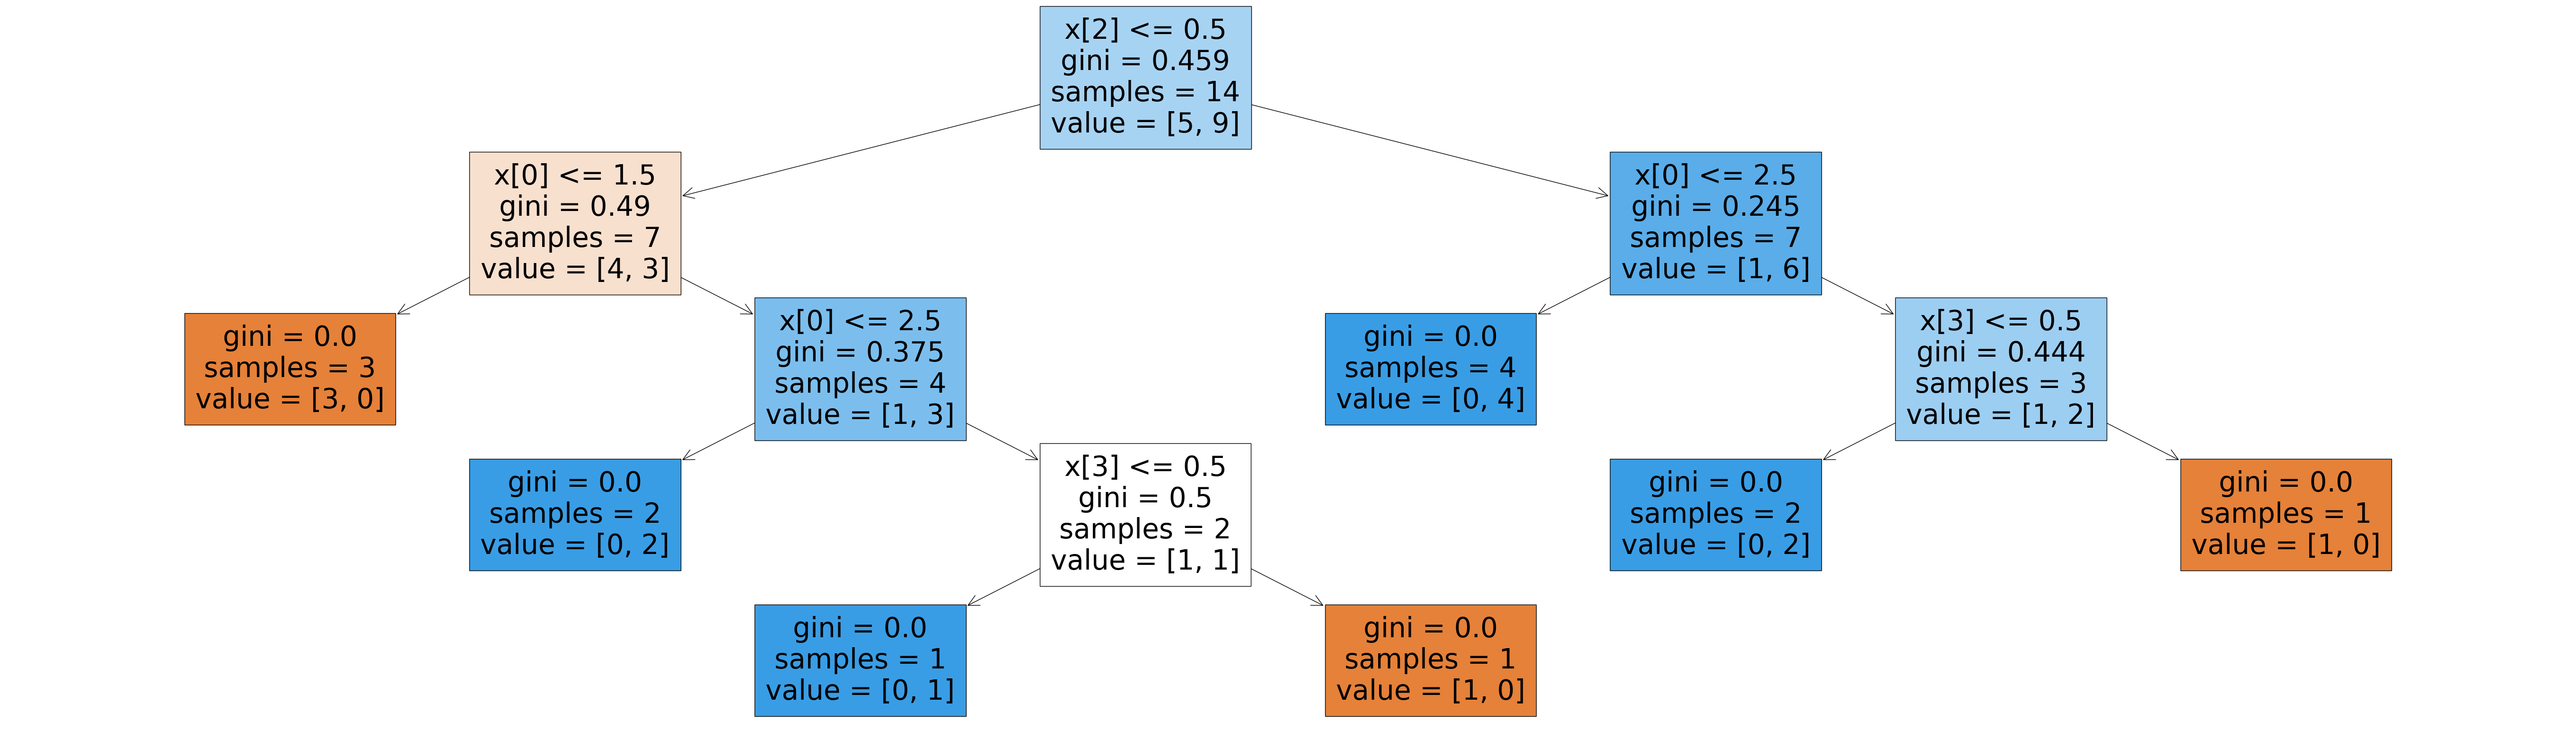

In [ ]:
plt.figure(figsize=(70,20)) #lenght and width of the fig
tree.plot_tree(dt, filled=True) # true helps in filling the tree nodes with colours based on class distribution
plt.show()

A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code
for help

In [ ]:
from google.colab import files
upload = files.upload()

Saving t5_train (1).xlsx to t5_train (1).xlsx


In [ ]:
excel = pd.ExcelFile('t5_train (1).xlsx')
data = pd.read_excel(excel,'Sheet1')


In [ ]:
data

,Unnamed: 0,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0,-0.031154,0.005788,0.013190,0.032214,-0.002240,-0.007682,-0.042094,0.069687,0.041463,...,-0.052788,0.025505,-0.031762,-0.028066,-0.015836,0.020776,0.019726,-0.000173,-0.037625,-0.029255
1,1,-0.059829,-0.029655,0.023997,0.029381,-0.008910,0.002651,-0.021002,0.062534,0.041522,...,-0.024644,-0.002297,-0.039347,-0.055724,0.030523,0.044003,0.000522,-0.015451,-0.015479,-0.025860
2,2,-0.051916,0.002292,0.037476,0.018359,-0.009908,0.007921,-0.056453,0.073637,-0.002247,...,-0.015411,0.034888,-0.027017,-0.026406,-0.003014,0.036860,0.031879,-0.033040,-0.041552,0.003078
3,3,-0.065384,-0.042939,0.011656,0.032460,-0.013346,0.003960,-0.037575,0.053072,0.037404,...,-0.018055,-0.021441,-0.034868,-0.050517,0.026233,0.061242,0.004917,-0.020379,-0.039484,-0.018563
4,4,-0.060732,-0.030397,0.010289,0.024453,-0.004234,-0.000490,-0.037785,0.077979,-0.000518,...,-0.007468,0.018795,-0.028469,-0.058496,0.014169,0.047644,0.019805,-0.004765,-0.030699,0.001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1122,-0.026631,-0.024138,0.022152,0.030705,-0.010941,0.010412,-0.068544,0.040590,0.020089,...,-0.041870,0.005108,-0.030552,-0.031571,0.000763,0.041070,0.018058,0.011748,-0.019817,-0.051990
1123,1123,-0.027868,-0.025621,0.021914,0.026630,-0.010832,0.006786,-0.064095,0.041112,0.022489,...,-0.044721,0.003304,-0.034322,-0.033685,0.000810,0.036538,0.018109,0.015402,-0.022393,-0.051995
1124,1124,-0.022655,-0.022344,0.028929,0.031298,-0.000826,0.014729,-0.062079,0.036594,0.022011,...,-0.038476,0.000219,-0.026677,-0.037036,-0.005554,0.044752,0.019307,0.008449,-0.014606,-0.051293
1125,1125,-0.019132,-0.029746,0.020091,0.027317,-0.008917,0.006835,-0.068679,0.038859,0.021410,...,-0.042361,-0.002104,-0.043841,-0.035514,-0.003528,0.030043,0.015535,0.023486,-0.018750,-0.058408


Training Accuracy: 1.0
Test Accuracy: 0.887905604719764


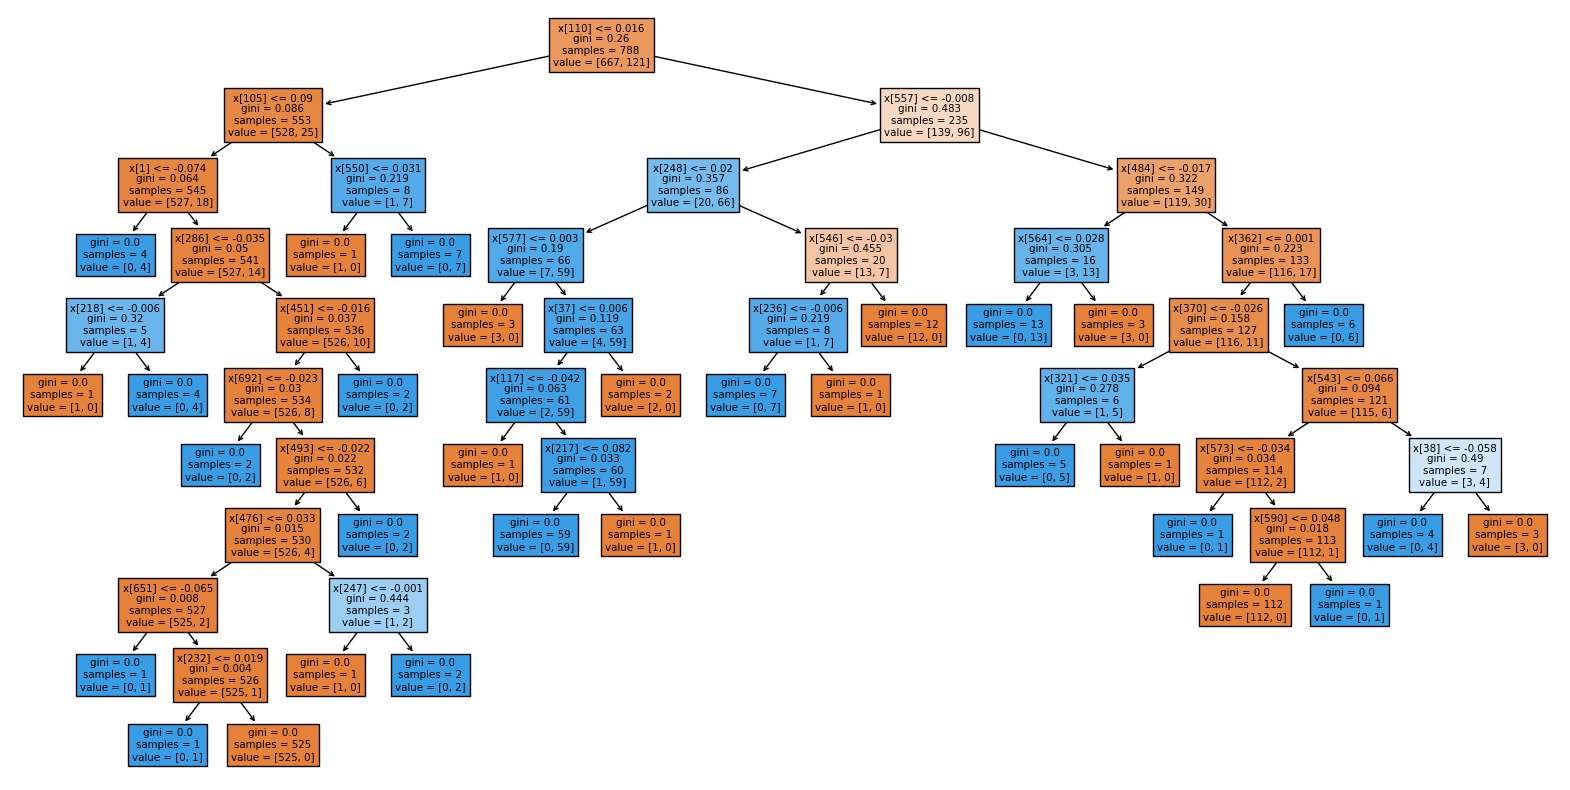

In [ ]:
X=df.iloc[:,:-1].values #feature data
y=df.iloc[:,-1].values #target data

# Threshold to segregate into 2 classes (range[-infinity,0] as 0 and range[0,infinity] as 1)
threshold = 0    # Values greater than or equal to the threshold will be assigned a label of 1, and values less than the threshold will be assigned a label of 0.
y_binary = np.where(y >= threshold, 1, 0)
X_train,X_test,y_train,y_test=train_test_split(X,y_binary,test_size=0.3) #dividing into training and testing

#creating decision tree
clf = DecisionTreeClassifier(random_state=50)
clf.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = clf.predict(X_train) # predictions are made using  test and train data
y_test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred) # accuracy for the pridicted values
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt




A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the
accuracies. Visualize the tree constructed with max_depth constraint.

In [112]:
dtree2 = DecisionTreeClassifier(max_depth=5)
dtree2 = dtree2.fit(X_train,y_train)
print("Training data accuracy: ", dtree2.score(X_train, y_train))
print("Test set accuracy: ", dtree2.score(X_test,y_test))
print(dtree2.get_depth()) # since 3<5, there is no change in the 2 graphs

Training data accuracy:  0.9784263959390863
Test set accuracy:  0.8820058997050148
5


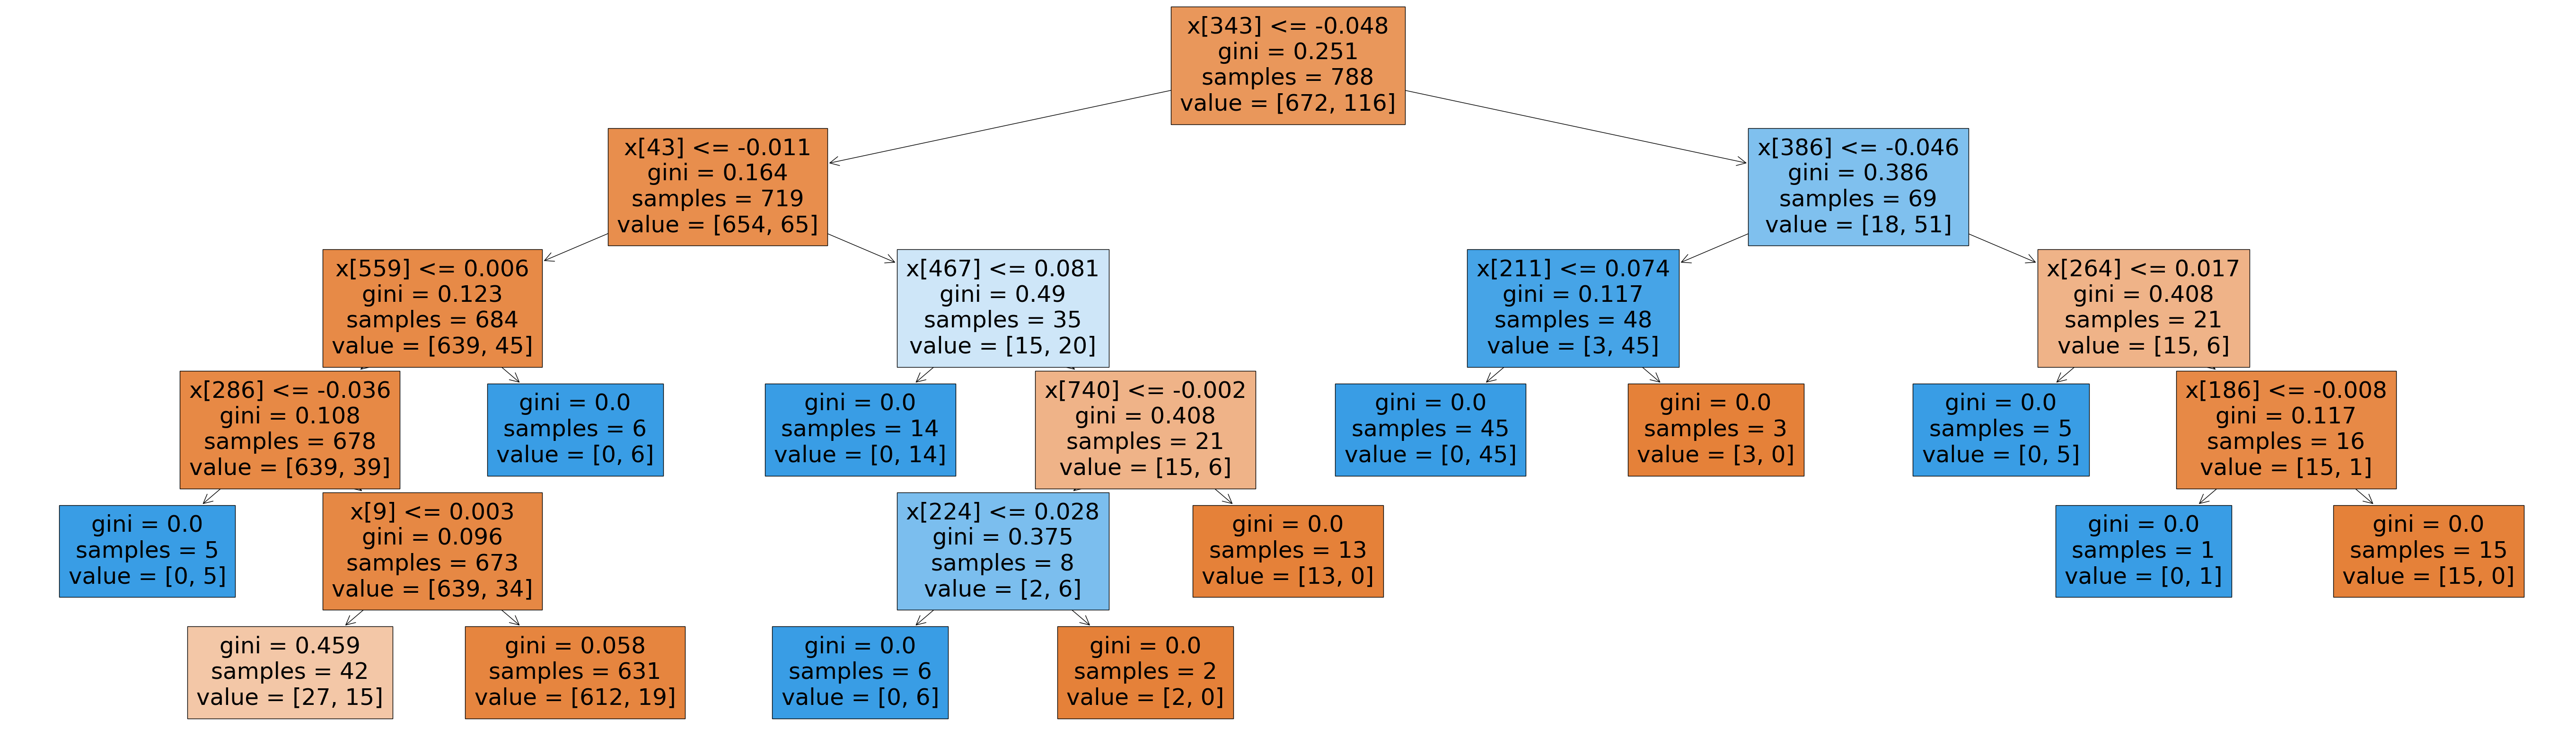

In [ ]:
plt.figure(figsize=(70,20))
tree.plot_tree(dtree2, filled=True)
plt.show()


A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study
the model & graph. Find the differences between the default criterion and entropy criterion. Refer
code below for criterion

In [ ]:
dtree3 = DecisionTreeClassifier(criterion='entropy')
dtree3 = dtree3.fit(X_train,y_train)
print("Training data accuracy: ", dtree3.score(X_train, y_train))
print("Test set accuracy: ", dtree3.score(X_test,y_test))
print(dtree3.get_depth())

Training data accuracy:  1.0
Test set accuracy:  0.8672566371681416
7


A7. Construct arandom forest classifier on your project data. Find the differences between the decision tree& random forest classifiers with the help of the performance metrics.

Classification Report of DecisionTree:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       290
           1       0.65      0.57      0.61        49

    accuracy                           0.89       339
   macro avg       0.79      0.76      0.77       339
weighted avg       0.89      0.89      0.89       339


Random Forest Classifier:
Accuracy: 0.9292
Classification Report of Random Forest classifier:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       290
           1       0.90      0.57      0.70        49

    accuracy                           0.93       339
   macro avg       0.92      0.78      0.83       339
weighted avg       0.93      0.93      0.92       339



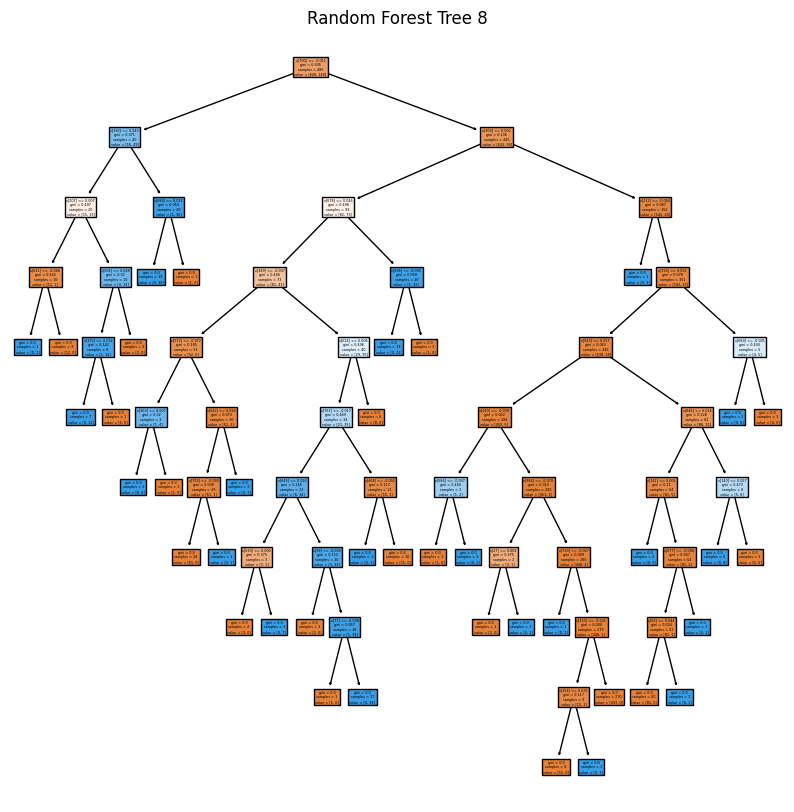

In [ ]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, classification_report
 #Evaluation Desicion tree
report_of_tree = classification_report(y_test, y_test_pred)
print("Classification Report of DecisionTree:")
print(report_of_tree)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=50)
random_forest_classifier.fit(X_train, y_train)


y_pred_rf = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report of Random Forest classifier:")
print(report_rf)

tree_to_visualize = 8
estimator = random_forest_classifier.estimators_[tree_to_visualize]

# Plot the tree
plt.figure(figsize=(10, 10))
from sklearn.tree import plot_tree
plot_tree(estimator, filled=True)
plt.title(f"Random Forest Tree {tree_to_visualize}")
plt.show()

 A8.Study the various parameters and model attributes of random forest classifier. Understand their significance in the behavior of the model

As we saw in the above question the diffence in various parameters such as accuracy, precision, f1 score and etc the difference between these two trees is 0.02 to 0.03

In [ ]:
pip install scikit-learn
